## Observations and Insights 

In observing the bar graph for the "Number of Mice per Treatment", all the treatments are just about the same number except for Capomulin and Ramicane which is a little higher than above, with Capomulin being the highest number of mice using this treatment. Propriva is the least used treatment. 

In observing the pie chart for the Male vs Female Mouse Population, the number of male and female mice are almost equatable to be 50% each. This would make sense to have just about an even number of each sex so that results don't vary due to sex. 

In observing the box plot chart for "Most Promising Treatments Show No Significant Outliers", there is only one treatment, Infubinol, with an outlier and it is also the treatment which has the highest tumor volume. This makes for an interesting case on why there is an outlier presented in this treatment data.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

# Study data files
mouse_data_path = "Resources/mouse_data.csv"
study_results_path = "Resources/study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_data_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset

mouse_results = pd.merge(study_results, mouse_data, how="left", on=["Mouse ID"])

# Display the data table for preview

mouse_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
len(mouse_results)

1893

In [6]:
# Checking the number of mice.

mice_number=mouse_results["Mouse ID"].unique()

mice=len(mice_number)

mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_results.loc[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [8]:
len(duplicate_mice)

1

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_mouse=mouse_results.loc[mouse_results["Mouse ID"] == 'g989']

all_duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = mouse_results[mouse_results['Mouse ID'].isin(duplicate_mice)==False]

clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
len(clean_df)

1880

In [12]:
# Checking the number of mice in the clean DataFrame.

clean_mice=clean_df["Mouse ID"].unique()

clean_number_mice=len(clean_mice)

clean_number_mice


248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]

regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]

regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


In [14]:
summary_stats_table = pd.DataFrame({"Mean": regimen_mean, 
                                    "Median":regimen_median, 
                                    "Variance":regimen_variance, 
                                    "Standard Deviation": regimen_std, 
                                    "SEM": regimen_sem})

summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

group_df = clean_df.groupby('Drug Regimen')
summary_stats_table2 = group_df.agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
summary_stats_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

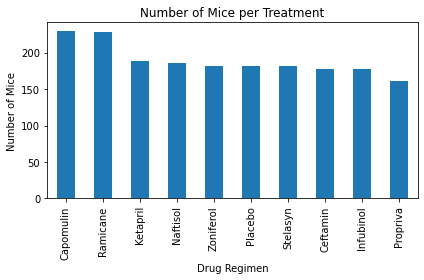

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

number_measurements = mouse_results['Drug Regimen'].value_counts()

number_measurements.plot(kind="bar")

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()
plt.show()

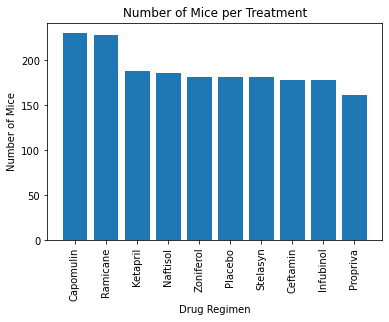

In [56]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(number_measurements))

plt.bar(x_axis, number_measurements)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, number_measurements.index.values)
plt.xticks(rotation=90)

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

In [44]:
 # Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender = mouse_results['Sex'].value_counts()
mouse_gender

Male      958
Female    935
Name: Sex, dtype: int64

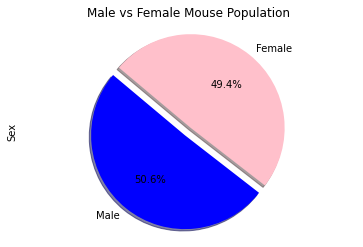

In [55]:
colors = ['blue', 'pink']
explode = (0.1, 0)

plot = mouse_gender.plot(kind="pie", colors = colors, explode = explode, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.axis('equal')

plt.show()

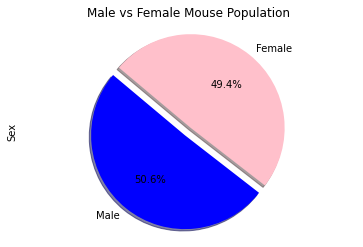

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ['blue', 'pink']
explode = (0.1, 0)

plt.pie(mouse_gender, explode=explode, labels=mouse_gender.index.values, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.axis('Equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = pd.DataFrame(mouse_results.groupby("Mouse ID")["Timepoint"].max())
final_timepoints = final_timepoints.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volumes = final_timepoints.merge(mouse_results, on = ["Mouse ID", "Timepoint"], how='left')
final_volumes.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [58]:
# Put treatments into a list for for loop (and later for plot labels)

analyzed_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in analyzed_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    tumor_vol = final_volumes.loc[final_volumes["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']
        
    # add subset 
    
    tumor_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds

    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75, 1])
    q3 =  quartiles[0.75] 
    q1 =  quartiles[0.25]
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    regimen_outliers = tumor_vol.loc[(tumor_vol < lower_bound) |
                                         (tumor_vol > upper_bound)]
    
    print(f"The number of potential outliers of {regimen} is: {regimen_outliers}")

The number of potential outliers of Capomulin is: Series([], Name: Tumor Volume (mm3), dtype: float64)
The number of potential outliers of Ramicane is: Series([], Name: Tumor Volume (mm3), dtype: float64)
The number of potential outliers of Infubinol is: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The number of potential outliers of Ceftamin is: Series([], Name: Tumor Volume (mm3), dtype: float64)


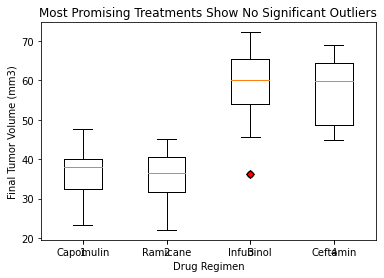

In [137]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_diamond = dict(markerfacecolor='r', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Most Promising Treatments Show No Significant Outliers')

ax3.boxplot(tumor_vol_list, flierprops=red_diamond)

plt.boxplot(tumor_vol_list, labels = analyzed_regimens)

plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

In [64]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = mouse_results.loc[mouse_results["Drug Regimen"] == "Capomulin", :]

lineplot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128",:]
lineplot_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22


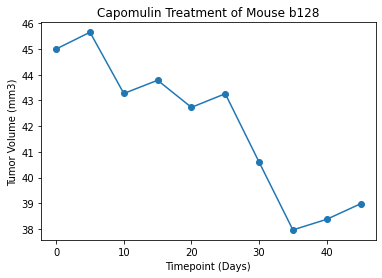

In [147]:
x_axis = lineplot_df["Timepoint"]
y_axis = lineplot_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, marker="o")

plt.title('Capomulin Treatment of Mouse b128')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

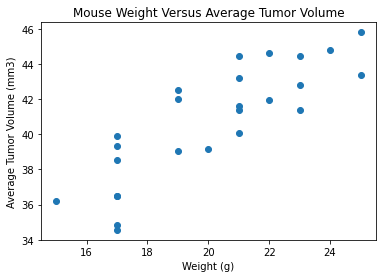

In [80]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average_vol = Capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(average_vol['Weight (g)'],average_vol['Tumor Volume (mm3)'])

plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [146]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(average_vol['Weight (g)'],average_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


The correlation between mouse weight and average tumor volume is 0.84


In [148]:
x_values = average_vol['Weight (g)']
y_values = average_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

y = 0.95x + 21.55


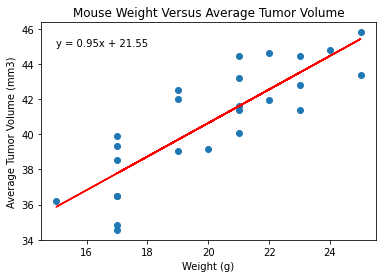

In [151]:
# Plot the linear regression model on top of the previous scatter plot.

plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq, (15,45))

plt.scatter(average_vol['Weight (g)'],average_vol['Tumor Volume (mm3)'])

plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()